In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import csv
urls_uueduudised_toor = []

#võib sisaldada mittetöötavaid linke
#with open('uued_uudised_scraper/uued_uudised_scraper/spiders/uueduudised_rubriigid_arhiiv.csv', 'r', encoding = 'utf-8') as f:

#katkised lingid eemaldatud
with open('uued_uudised_scraper/uued_uudised_scraper/spiders/uueduudised_rubriigid_arhiiv_muudetud.csv', 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for line in reader:
        if line != []:
            urls_uueduudised_toor.append(line[0])

In [7]:
len(urls_uueduudised_toor)

14130

In [13]:
def my_function(x):
      return list(dict.fromkeys(x))

urls_uueduudised = my_function(urls_uueduudised_toor)

print(len(urls_uueduudised))

13963


In [14]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd

pealkirjad = []
tekstid = []
väljaanded = []
ajad =[]
reklaamiteade = 'Järgneb Google reklaam. Uute uudiste toimetus ei vastuta Google algoritmide poolt personaalselt teile suunatud reklaamide sisu eest. Soovitame usaldada ainult tuntud ja usaldusväärseid kaubamärke.'
for url in tqdm(urls_uueduudised[:6000]):
    page = requests.get(url)

    soup = BeautifulSoup(page.content, "html.parser")
    pealkiri = soup.find("meta", {"property" : "og:title"})['content']
    pealkiri = pealkiri.replace('\xa0','')
    väljaanne = soup.find("meta", {"property" : "og:site_name"})['content']
    aeg = soup.find("meta", {"itemprop" : "datePublished"})['content']

    artikkel = soup.findAll("div", {"itemprop" : "articleBody"})
    #artikkel = results.find_all("div")
    yhendatud_tekst = ''
    for art in artikkel:
        loik = art.find_all("p")
        for l in loik:
            if reklaamiteade not in l.text:
                text = l.text.replace('\n','')
                text = text.replace('\xa0','')
                text = text + ' '
                yhendatud_tekst += text
    tekstid.append(yhendatud_tekst)
       
    pealkirjad.append(pealkiri)
    väljaanded.append(väljaanne)
    ajad.append(aeg)

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [51:22<00:00,  1.95it/s]


In [15]:
artiklid_6000 = {'title': pealkirjad, 'text': tekstid,'subject': väljaanded, 'date': ajad, 'link': urls_uueduudised[:6000]}

In [16]:
data_uueduudised_rubriigid = pd.DataFrame(artiklid_6000, columns = ['title', 'text','subject', 'date', 'link'])

In [17]:
data_uueduudised_rubriigid.shape

(6000, 5)

In [18]:
data_uueduudised_rubriigid.dropna(inplace=True)

In [19]:
data_uueduudised_rubriigid.shape

(6000, 5)

In [20]:
data_uueduudised_rubriigid.to_csv('data_uueduudised.csv',index=False)

subject
Uued Uudised    6000
Name: text, dtype: int64


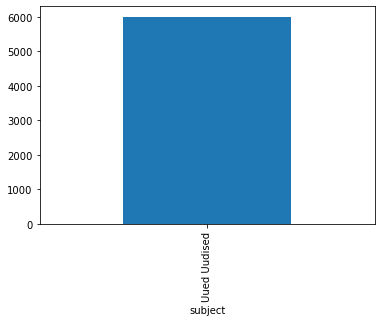

In [21]:
# How many articles per subject?
print(data_uueduudised_rubriigid.groupby(['subject'])['text'].count())
data_uueduudised_rubriigid.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [22]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju', 'setu']

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [20:07<00:00,  4.97it/s]


(-0.5, 799.5, 499.5, -0.5)

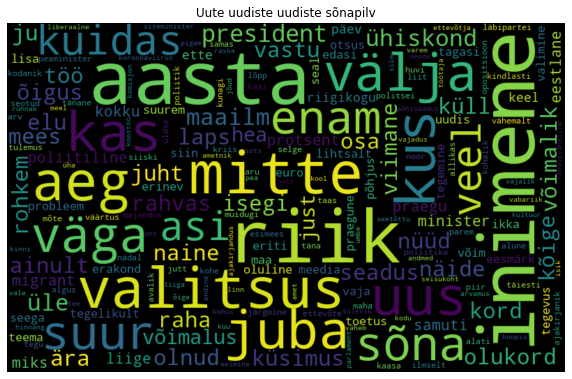

In [24]:
from wordcloud import WordCloud
from estnltk import Text
from tqdm import tqdm

real_sonad = []
for i in tqdm(range (0, len(data_uueduudised_rubriigid))):
    rida = data_uueduudised_rubriigid.iloc[i]
    #print(rida[1])
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U' or sona[0][1] == 'D':
            real_sonad.append(sona[0][0])

all_words = ' '.join(map(str, real_sonad))

wordcloud = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Uute uudiste uudiste sõnapilv")
plt.savefig('Uuteuudiste_sõnapilv.png')
plt.axis("off")